In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

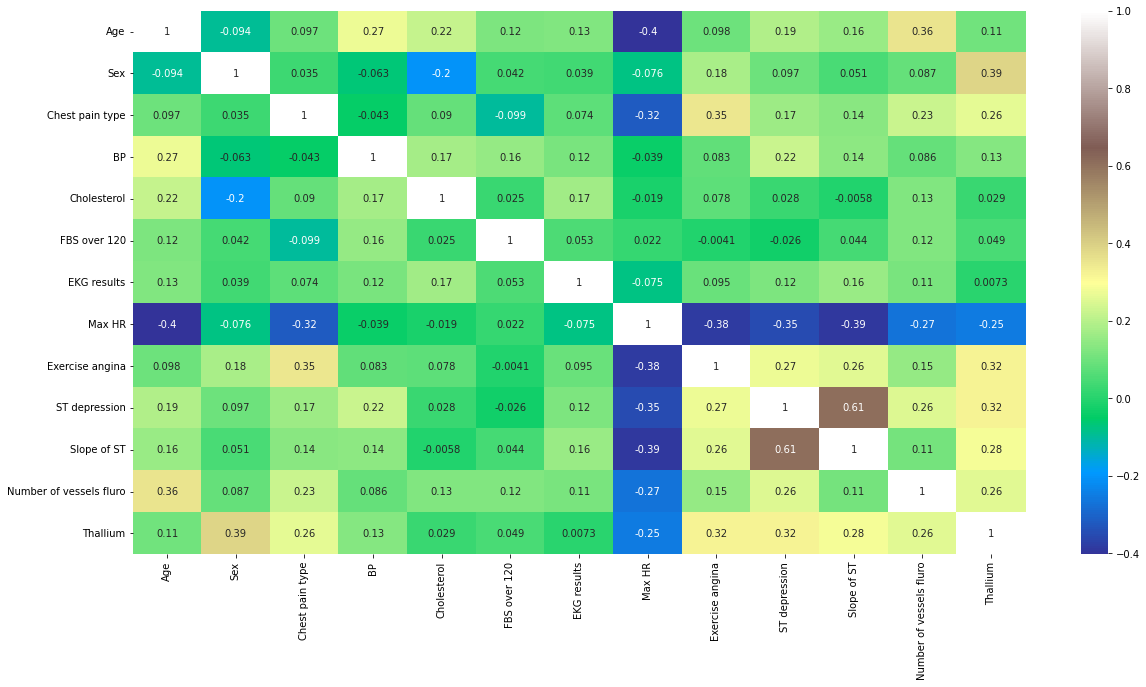

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

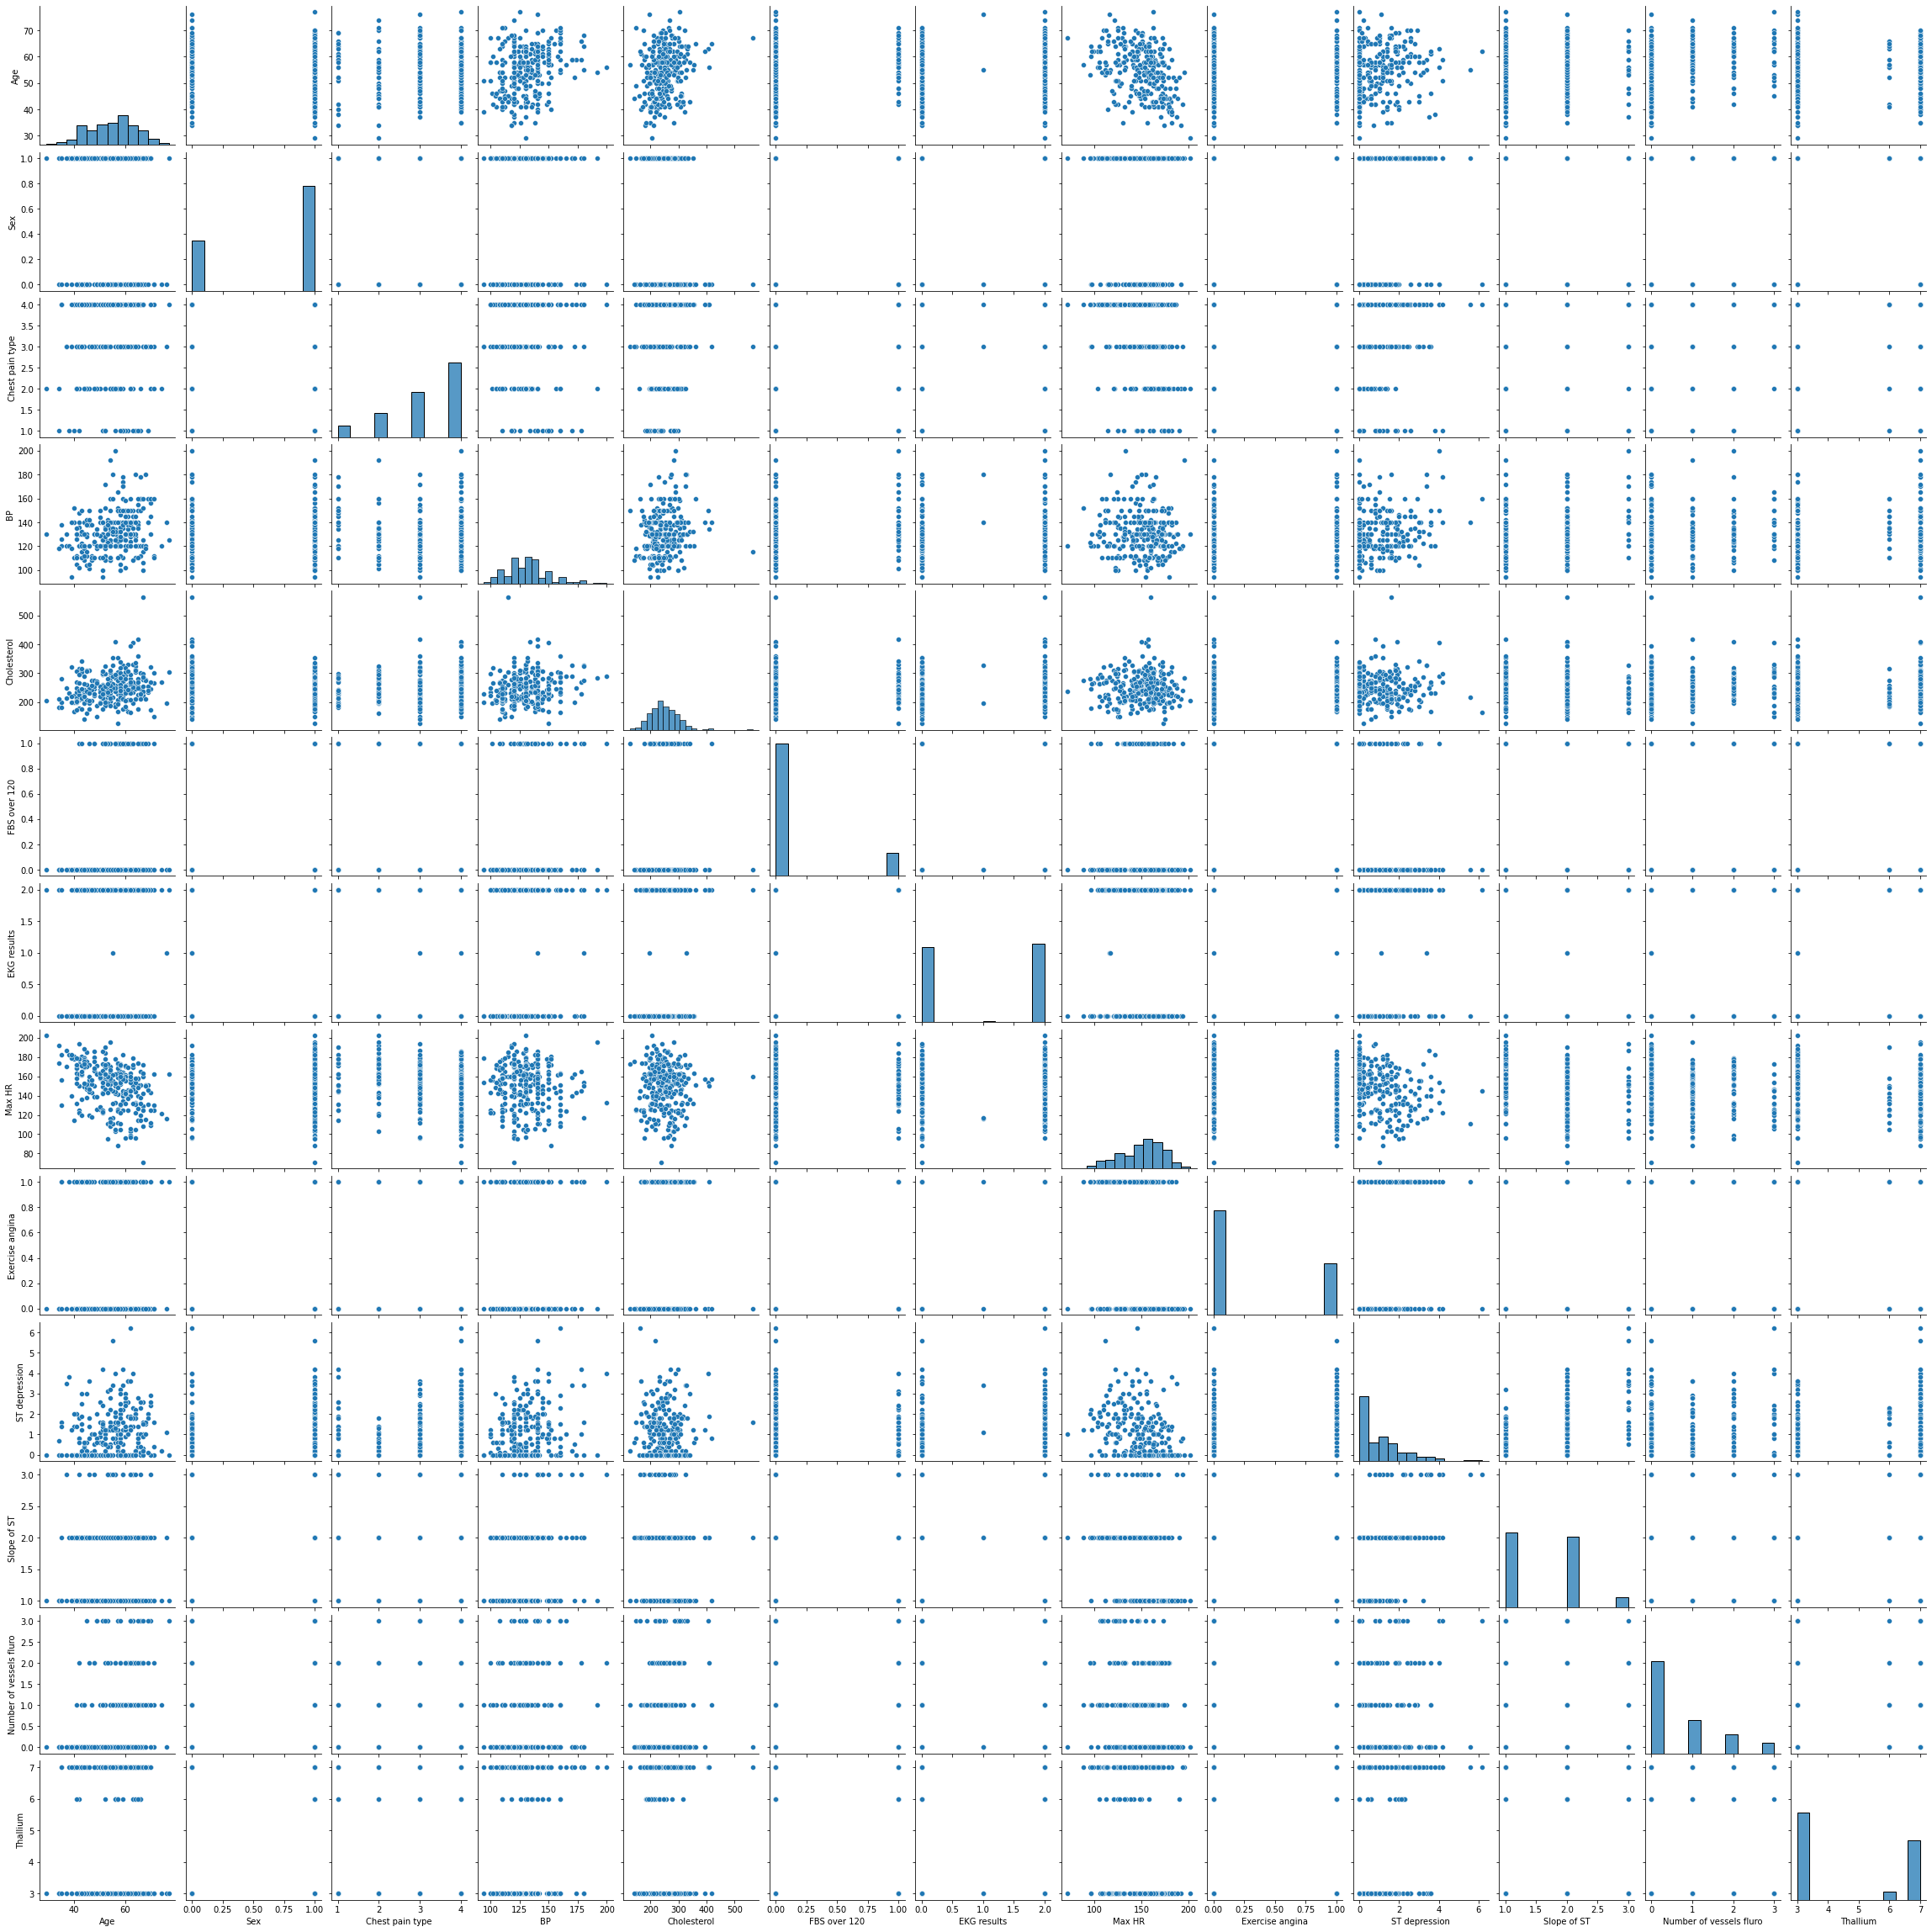

In [ ]:
sns.pairplot (data=df)

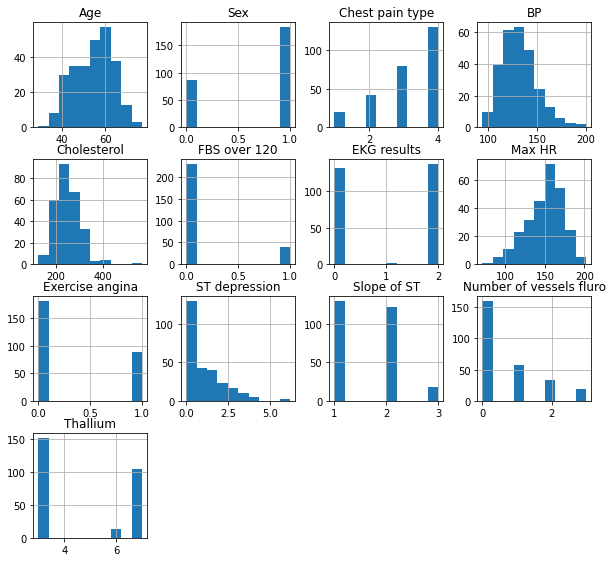

In [ ]:
df.hist (figsize=(10,12), layout=(5,4));

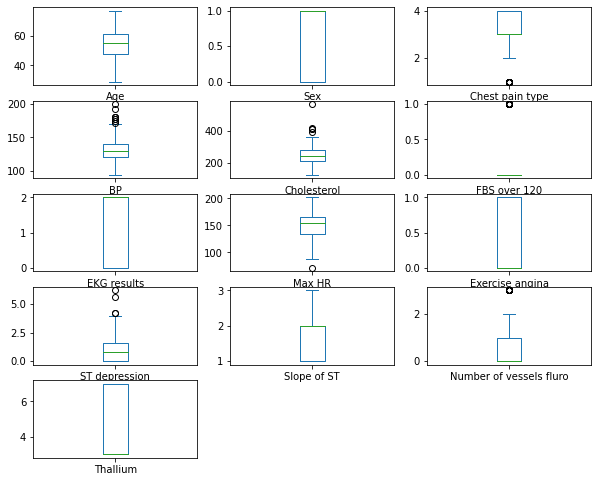

In [ ]:
df.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10)) 
plt.show()


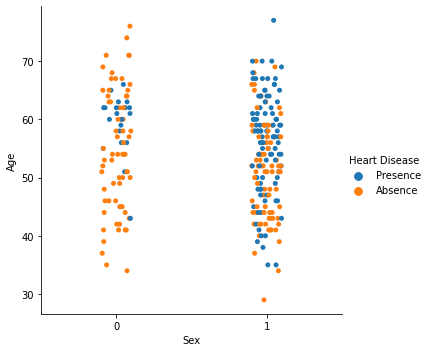

In [ ]:
sns.catplot(data=df, x='Sex', y='Age',hue='Heart Disease', palette='tab10')

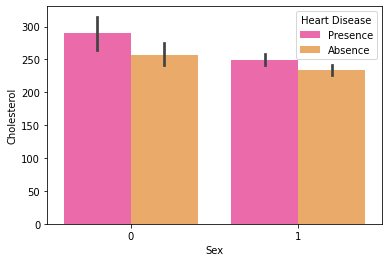

In [ ]:
sns.barplot(data=df, x='Sex', y='Cholesterol', hue='Heart Disease', palette='spring')


In [ ]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [ ]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

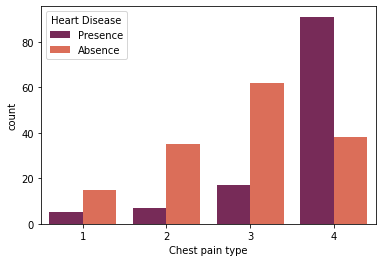

In [ ]:
sns.countplot(x ='Chest pain type', hue='Heart Disease', data=df, palette='rocket')


In [ ]:
gen = pd.crosstab (df[ 'Sex'], df['Heart Disease']) 
print(gen)

Heart Disease  Absence  Presence
Sex                             
0                   67        20
1                   83       100


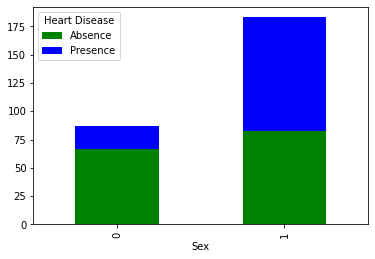

In [ ]:
gen.plot(kind='bar', stacked='True', color=['green', 'blue'], grid=False)

In [70]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
StandardScaler = StandardScaler()
columns_to_scale=['Age', 'EKG results', 'Cholesterol', 'Thallium', 'Number of vessels fluro']
df[columns_to_scale]= StandardScaler.fit_transform(df[columns_to_scale])




In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
x=df.drop(['Heart Disease'], axis=1) 
y=df[ 'Heart Disease']

In [71]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=40)

In [72]:
print('x_train-', x_train.size)
print('x test-', x_test.size)
print('y train-', y_train. size)
print('x_test-', x_test.size)

x_train- 2457
x test- 1053
y train- 189
x_test- 1053


In [74]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
model1=lr.fit(x_train,y_train) 
prediction1= model1.predict(x_test)


In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm


array([[41,  4],
       [ 9, 27]])

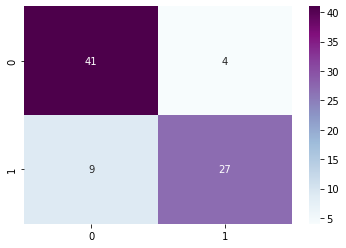

In [77]:
sns.heatmap(cm, annot=True, cmap='BuPu')

In [78]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0] 
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN+FN)/(TP+TN+FN+FP))


Testing Accuracy: 0.9506172839506173


In [79]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, prediction1)

0.8395061728395061

In [80]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, prediction1))


              precision    recall  f1-score   support

     Absence       0.82      0.91      0.86        45
    Presence       0.87      0.75      0.81        36

    accuracy                           0.84        81
   macro avg       0.85      0.83      0.83        81
weighted avg       0.84      0.84      0.84        81



In [82]:
print('NB:', accuracy_score(y_test, prediction1))

NB: 0.8395061728395061
